#HW6 Control with Approximation


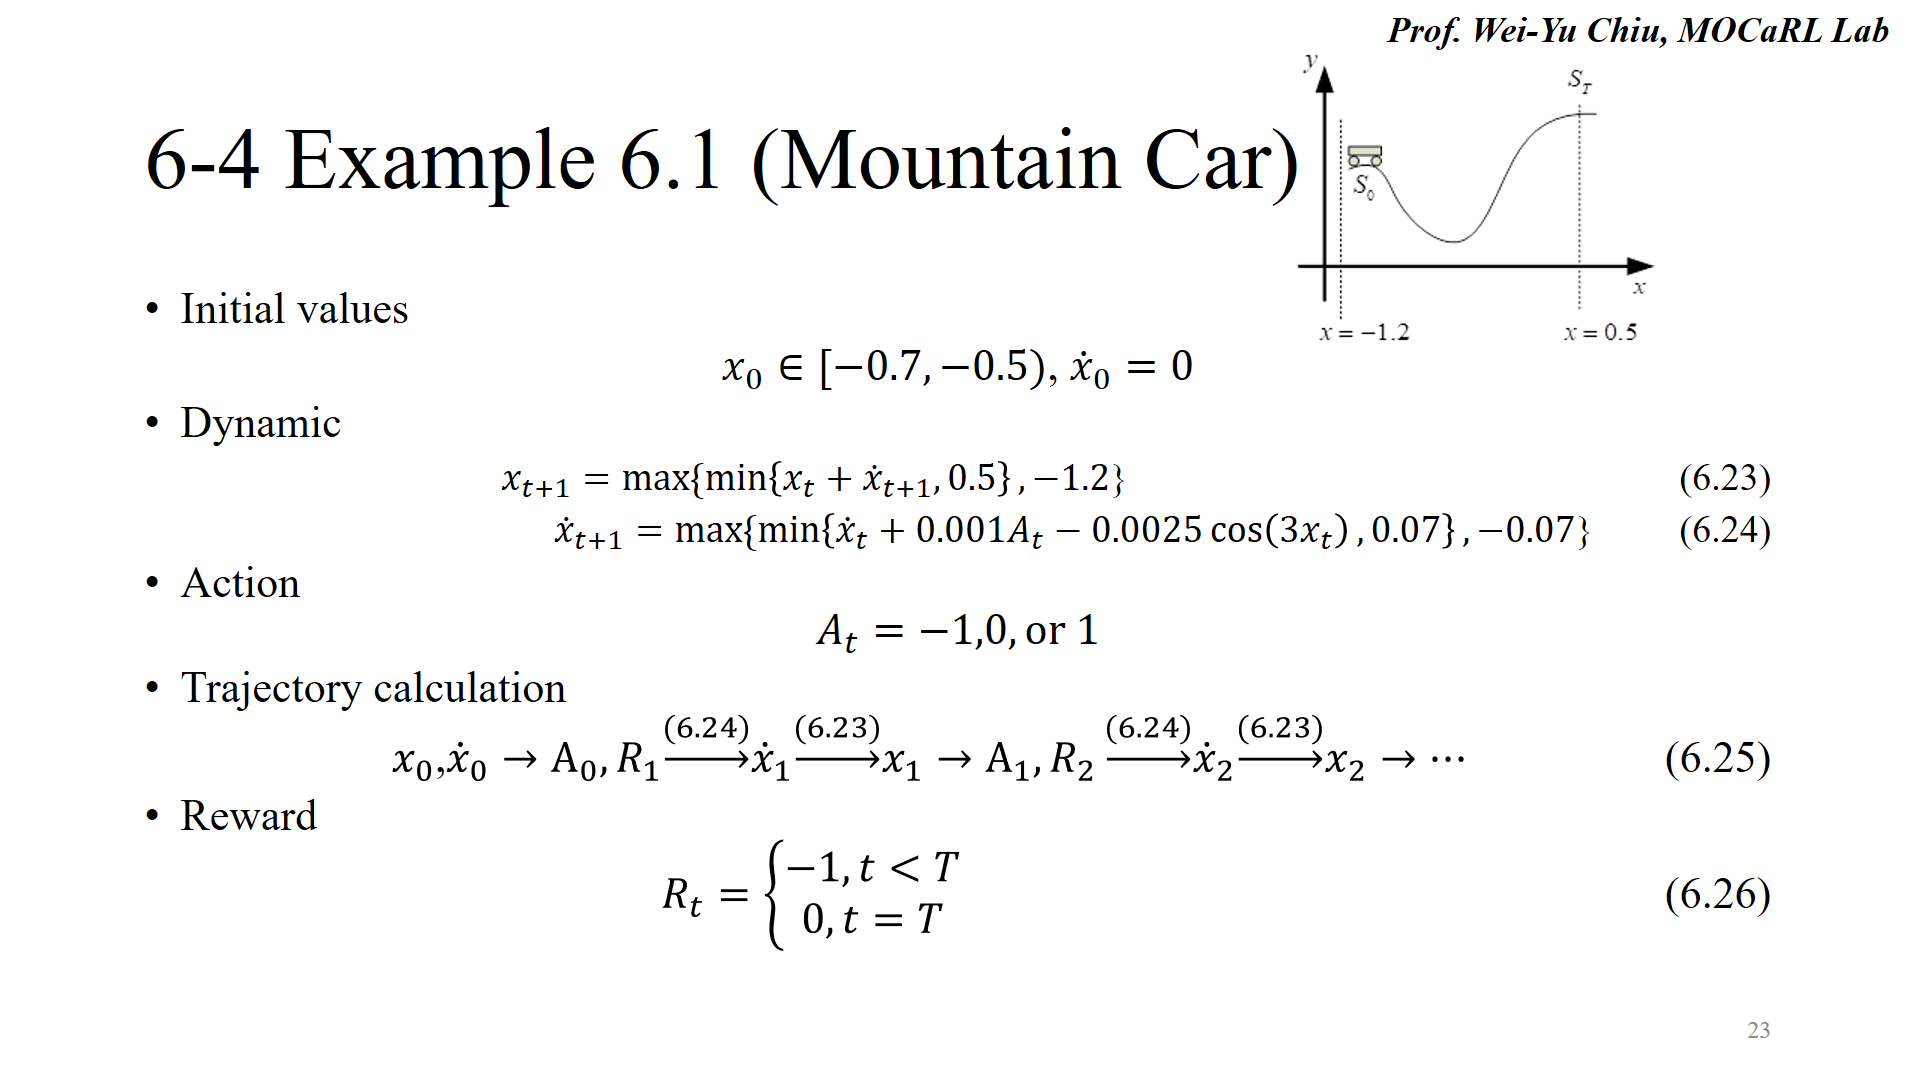

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

In [ ]:
# Environment
def step(state, action):
    position = state[0]
    velocity = state[1]
    acc = action - 1
    new_velocity = velocity + 0.001 * acc - 0.0025 * np.cos(3 * position)
    new_velocity = min(max(-0.07, new_velocity), 0.07)
    new_position = position + new_velocity
    new_position = min(max(-1.2, new_position), 0.5)
    reward = -1.0
    if new_position == -1.2:
        new_velocity = 0.0
    return [new_position, new_velocity], reward

In [ ]:
# Tile coding
class Approximate_Q_learning():
    def __init__(self):

        self.alpha = 0.05
        self.gamma = 0.99
        self.epsilon = 0.005

        # set up position tile 
        pos_range = [-1.2, 0.5]
        pos_side_num = 15
        l_pos = pos_side_num / (pos_side_num - 1 + 1 / 2) #6.13
        p_pos = l_pos / (2 * pos_side_num) #6.14

        # set up velocity tile 
        vel_range = [-0.07, 0.07]
        vel_side_num = 5
        l_vel = vel_side_num/(vel_side_num-1+1/2) #6.13
        p_vel = l_vel/(2*vel_side_num) #6.14

        # set up tiling 1
        pos_range1 = [pos_range[0], pos_range[1] + (2-1)*p_pos]
        vel_range1 = [vel_range[0], vel_range[1] + (2-1)*p_vel]

        # set up tiling 2
        pos_range2 = [pos_range[0] - p_pos, pos_range[1]]
        vel_range2 = [vel_range[0] - p_vel, vel_range[1]]

        # make grid in tiling 1
        self.pos_bin1 = np.linspace(pos_range1[0], pos_range1[1], num=pos_side_num)
        self.vel_bin1 = np.linspace(vel_range1[0], vel_range1[1], num=vel_side_num)

        # make grid in tiling 2
        self.pos_bin2 = np.linspace(pos_range2[0], pos_range2[1], num=pos_side_num)
        self.vel_bin2 = np.linspace(vel_range2[0], vel_range2[1], num=vel_side_num)

        # make storage space to weight of tiling1 and tiling2
        self.tiling1 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling2 = np.zeros([pos_side_num, vel_side_num, 3])

    # check which tile would be activated
    def state_coding(self, state):
        i_pos1 = np.digitize([state[0]], self.pos_bin1, right=True)[0]
        i_vel1 = np.digitize([state[1]], self.vel_bin1, right=True)[0]

        i_pos2 = np.digitize([state[0]], self.pos_bin2, right=True)[0]
        i_vel2 = np.digitize([state[1]], self.vel_bin2, right=True)[0]

        return (i_pos1, i_vel1, i_pos2, i_vel2)

    # evaluate q-value
    def evaluate_Q(self, coded_state, action):
        Q = self.tiling1[coded_state[0], coded_state[1], action] + self.tiling2[coded_state[2], coded_state[3], action]
        return Q
    # update weight of tile
    def update_Q(self, state, action, reward, next_state, S_t):

        coded_state = self.state_coding(state)
        coded_next_state = self.state_coding(next_state)
        Q = self.evaluate_Q(coded_state, action)

        if state[0] >= S_t:
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward - Q)
        else:
            Q_ = np.max([self.evaluate_Q(coded_next_state, i) for i in range(3)])
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward + self.gamma * Q_ - Q)

    # epsilon greedy action
    def act(self, state):
        coded_state = self.state_coding(state)

        if np.random.rand() < self.epsilon:
            action = np.random.randint(3)
        else:
            action = np.argmax([self.evaluate_Q(coded_state, i) for i in range(3)])
        return action



In [ ]:
# 3-Tile coding
class Approximate_Q_learning3():
    def __init__(self):

        self.alpha = 0.05
        self.gamma = 0.99
        self.epsilon = 0.005
        
        #3-tile coding
        # set up position tile  設定範圍
        pos_range = [-1.2, 0.5]  #起點、終點
        pos_side_num = 15  #切15分
        l_pos = pos_side_num / (pos_side_num - 1 + 1 / 3) #6.13 N瓦片層長度  Li=(pi/(pi-1)+1/N)            
        p_pos = l_pos / (3 * pos_side_num) #6.14 偏置量  

         # set up velocity tile 
        vel_range = [-0.07, 0.07] #速度
        vel_side_num = 5 #切5分
        l_vel = vel_side_num/(vel_side_num-1+1/3) #6.13
        p_vel = l_vel/(3*vel_side_num) #6.14

        # set up tiling 1
        pos_range1 = [pos_range[0], pos_range[1] + 2*p_pos]  #state值+偏置量
        vel_range1 = [vel_range[0], vel_range[1] + 2*p_vel]

        # set up tiling 2
        pos_range2 = [pos_range[0] - 1*p_pos, pos_range[1] + 1*p_pos]
        vel_range2 = [vel_range[0] - 1*p_vel, vel_range[1] + 1*p_vel]
        
        #set up tiling 3
        pos_range3 = [pos_range[0] - 2*p_pos, pos_range[1] ] 
        vel_range3 = [vel_range[0] - 2*p_vel, vel_range[1] ]
        
        # make grid in tiling 1
        self.pos_bin1 = np.linspace(pos_range1[0], pos_range1[1], num=pos_side_num)
        self.vel_bin1 = np.linspace(vel_range1[0], vel_range1[1], num=vel_side_num)
        

        # make grid in tiling 2
        self.pos_bin2 = np.linspace(pos_range2[0], pos_range2[1], num=pos_side_num)
        self.vel_bin2 = np.linspace(vel_range2[0], vel_range2[1], num=vel_side_num)
        
        # make grid in tiling 3
        self.pos_bin3 = np.linspace(pos_range3[0], pos_range3[1], num=pos_side_num)
        self.vel_bin3 = np.linspace(vel_range3[0], vel_range3[1], num=vel_side_num)

        # make storage space to weight of tiling1 and tiling2 and tiling3
        self.tiling1 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling2 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling3 = np.zeros([pos_side_num, vel_side_num, 3])

    # check which tile would be activated
    def state_coding(self, state):
        i_pos1 = np.digitize([state[0]], self.pos_bin1, right=True)[0]
        i_vel1 = np.digitize([state[1]], self.vel_bin1, right=True)[0]

        i_pos2 = np.digitize([state[0]], self.pos_bin2, right=True)[0]
        i_vel2 = np.digitize([state[1]], self.vel_bin2, right=True)[0]
        
        i_pos3 = np.digitize([state[0]], self.pos_bin3, right=True)[0]
        i_vel3 = np.digitize([state[1]], self.vel_bin3, right=True)[0]

        return (i_pos1, i_vel1, i_pos2, i_vel2 , i_pos3 , i_vel3)

    # evaluate q-value
    def evaluate_Q(self, coded_state, action):
        Q = self.tiling1[coded_state[0], coded_state[1], action] + self.tiling2[coded_state[2], coded_state[3], action] +self.tiling3[coded_state[4],coded_state[5], action]           
        return Q
    # update weight of tile
    def update_Q(self, state, action, reward, next_state, S_t):

        coded_state = self.state_coding(state)
        coded_next_state = self.state_coding(next_state)
        Q = self.evaluate_Q(coded_state, action)

        if next_state[0] >= S_t:
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward - Q)
            self.tiling3[coded_state[4], coded_state[5], action] += self.alpha * (reward - Q)
        else:
            Q_ = np.max([self.evaluate_Q(coded_next_state, i) for i in range(3)])
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling3[coded_state[4], coded_state[5], action] += self.alpha * (reward + self.gamma * Q_ - Q)

    # epsilon greedy action
    def act(self, state):
        coded_state = self.state_coding(state)

        if np.random.rand() < self.epsilon:
            action = np.random.randint(3)
        else:
            action = np.argmax([self.evaluate_Q(coded_state, i) for i in range(3)])
        return action


In [ ]:
# Simulation
def agent_Q(alpha_in):
    episodes = 500
    returns = np.zeros((episodes))
    agent = Approximate_Q_learning()
    agent.alpha = alpha_in
    for episode in range(episodes):

        state = [np.random.uniform(-0.7, -0.5), 0]

        G = 0
        while state[0] < 0.5:
            action = agent.act(state)
            state_next, reward = step(state, action)
            agent.update_Q(state, action, reward, state_next, S_t=0.5)
            state = state_next
            G += reward

        print(episode, ' episode returns: ', G)

        returns[episode] = G

    return returns


In [ ]:
def agent_Q3(alpha_in):
    episodes = 500
    returns = np.zeros((episodes))
    agent = Approximate_Q_learning3()
    agent.alpha = alpha_in
    for episode in range(episodes):

        state = [np.random.uniform(-0.7, -0.5), 0]

        G = 0
        while state[0] < 0.5:
            action = agent.act(state)
            state_next, reward = step(state, action)
            agent.update_Q(state, action, reward, state_next, S_t=0.5)
            state = state_next
            G += reward

        print(episode, ' episode returns: ', G)

        returns[episode] = G

    return returns

#Example function

0  episode returns:  -1744.0
1  episode returns:  -1694.0
2  episode returns:  -494.0
3  episode returns:  -981.0
4  episode returns:  -284.0
5  episode returns:  -511.0
6  episode returns:  -2242.0
7  episode returns:  -2582.0
8  episode returns:  -5035.0
9  episode returns:  -7237.0
10  episode returns:  -689.0
11  episode returns:  -298.0
12  episode returns:  -9860.0
13  episode returns:  -3422.0
14  episode returns:  -3594.0
15  episode returns:  -974.0
16  episode returns:  -4440.0
17  episode returns:  -8504.0
18  episode returns:  -442.0
19  episode returns:  -377.0
20  episode returns:  -206.0
21  episode returns:  -231.0
22  episode returns:  -314.0
23  episode returns:  -220.0
24  episode returns:  -721.0
25  episode returns:  -22737.0
26  episode returns:  -6925.0
27  episode returns:  -437.0
28  episode returns:  -450.0
29  episode returns:  -4451.0
30  episode returns:  -320.0
31  episode returns:  -237.0
32  episode returns:  -306.0
33  episode returns:  -318.0
34  episo

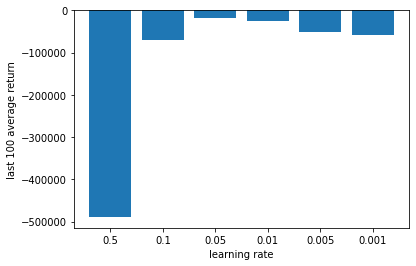

In [ ]:
alpha_list=[0.5,0.1,0.05,0.01,0.005,0.001]

plot_re = []
average_100 = []

for alpha in alpha_list:
  returns_100 = 0
  key = 0
  returns = agent_Q(alpha)
  for ep in range(400,500):
    if returns[ep] < -500000:
      returns_100 = -500000
      key = 1
      break
    else:
      returns_100 += returns[ep]
  if key == 0:
    plot_re.append(np.average(returns_100))
  else:
    plot_re.append(returns_100)

plt.xlabel("learning rate")
plt.ylabel('last 100 average return')
x_axis = ('0.5', '0.1', '0.05', '0.01', '0.005', '0.001')
y_axis = plot_re[0],plot_re[1],plot_re[2],plot_re[3],plot_re[4],plot_re[5]
plt.bar(x_axis,y_axis)
plt.show()

In [ ]:
returns_100 = []
# run 3-tile coding simulation
plot_re = []
average_100 = []
ave_100 = 0
returns = agent_Q3(0.05)
for ep in range(400,500):
  returns_100.append(returns[ep])
ave_100 = np.average(returns_100) 
print("average last 100 = ",ave_100)    
plt.plot(returns,label='aprox_q')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

#Question 1(20%)
Please see the 11 line in the following algorithm, what is the corresponding concept to the  Q-table method?
Why  it can't be coded like Q-table method?

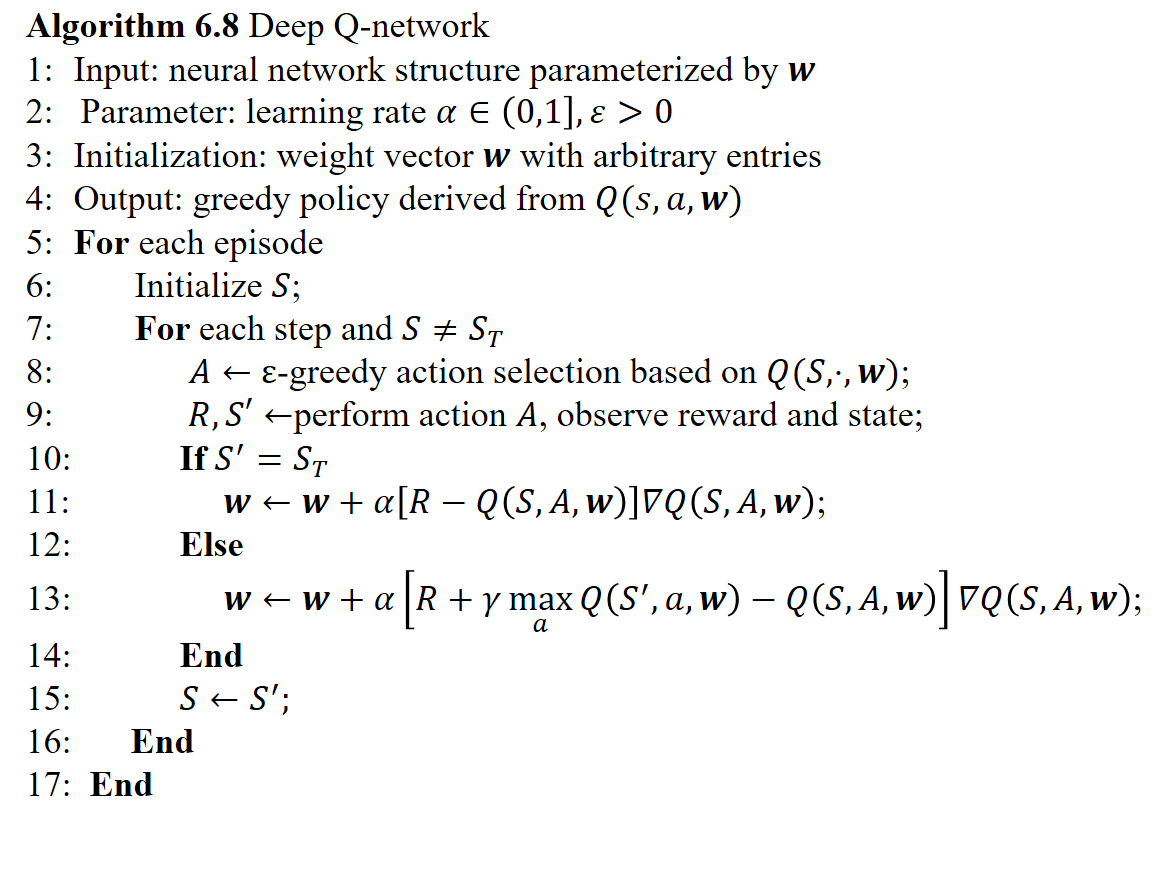


>Answer
>>因為DQN的方法採用自助法，所以必須設定Q(ST) = 0，但今天approximation function，難以定義最後狀態的值，所以在最終狀態就不去計算maxQ(S',a,w)，而寫出11式

>>Q-table因為必須記錄所有位置的Q值，如果今天環境很大，則使用Q-table會造成大量的記憶體消耗，而且有些問題是可以描述Q(S,A),但有的問題無法明確定義，所以才要使用weight的方式，藉由卷積神經網路來估算Q值。

# Experiment 1 (20%)
In Sarsa or Q-learning set learning rate to 0.9~0.1 usually work well, but in approximation method set learning rate to 0.1 is too big, please test the  learning rate(self.alpha) in these numbers [0.5 0.1 0.05 0.01 0.005 0.001], and make a graph, x-axis is learning rate y-axis is average of last 100 episode returns, you can break your simulation and set average return to -500,000,when an episode have return lower than -500,000.

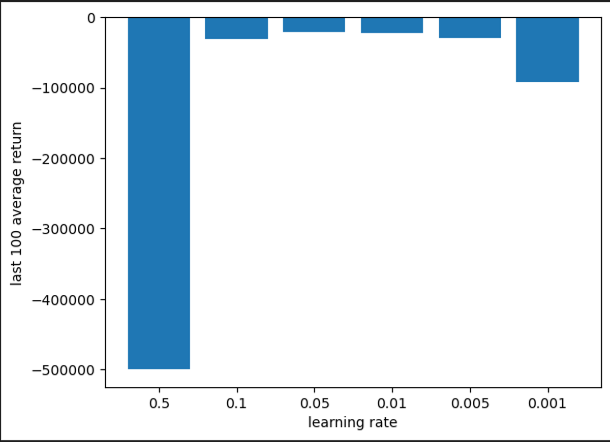

>可以看出，在learning rate = 0.5時，其平均returns相當高，而在其他learning rate 下都有較好的表現，可以發現，太大的learning rate與太小的learning rate，都會造成其平均獎勵不好，因為過大會造成其無法收斂，過小會造成其收斂太慢，所以適當的learning rate 可以大大增加平均獎勵。

>最佳learning rate = 0.05

# Experiment 2 (60%)
Example code have 2 tilings, please make the 3 tilings version, the average of last 100 episode returns must higher than -300, plot your result like emaple.

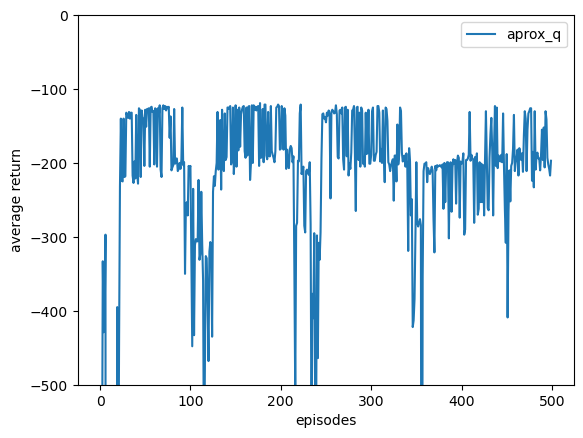

image.png

after change 2-tilings to 3-tilings, the average rewards are usually in -200 to -300. 